In [ ]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import setuptools.dist
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os


In [ ]:
base_dir = 'flowers/'

img_size = 224
batch = 64


In [ ]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, 
                                   zoom_range=0.2, horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
                                                  target_size=(
                                                      img_size, img_size),
                                                  subset='training',
                                                  batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
                                                target_size=(
                                                    img_size, img_size),
                                                subset='validation',
                                                batch_size=batch)


In [ ]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Input(shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))


In [ ]:
model.summary()


In [ ]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3384 - loss: 1.5952

/home/aarav/Flower-Recognition/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.3396 - loss: 1.5916 - val_accuracy: 0.5186 - val_loss: 1.1774
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.5130 - loss: 1.1856 - val_accuracy: 0.5581 - val_loss: 1.0966
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5852 - loss: 1.0570 - val_accuracy: 0.5535 - val_loss: 1.1232
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.5771 - loss: 1.0575 - val_accuracy: 0.6244 - val_loss: 0.9364
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.6606 - loss: 0.8825 - val_accuracy: 0.6640 - val_loss: 0.8682
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 0.6749 - loss: 0.8615 - val_accuracy: 0.6523 - val_loss: 0.8896
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.6967 - loss: 0.7854 - val_accuracy: 0.6744 - val_loss: 0.8431
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.6807 - loss: 0.8084 - val_accuracy: 0.6465 - val_loss: 0.

In [16]:
from tensorflow.keras.models import load_model
model.save('Model.h5')
 
# load model
savedModel=load_model('Model.h5')


In [15]:
train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[0. 0. 0. 1. 0.]]
sunflower


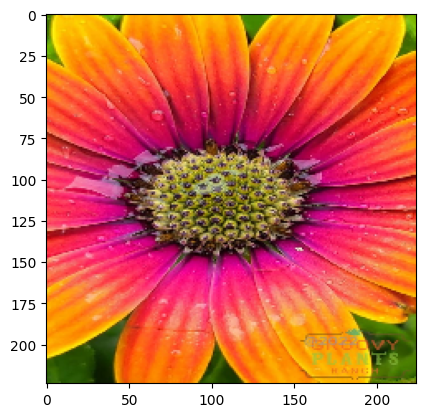

In [20]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('daisy_online.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break
